# Parte 2 Actividad 5.3.2

(40 pts) En un notebook separado, carga un conjunto de datos de KaggleLinks to an external site. de tu elección. Analizenlo y generen varias gráficas con Seaborn que les ayuden a entender los datos. Al terminar, crearán un video (max 2 min) donde ambos integrantes explicarán 4 gráficas de su elección y sus hallazgos derivados de estas visualizaciones. Suban el video a alguna plataforma y compartan el enlace al mismo en el notebook. Asegurate de modificar los permisos de acceso.

In [2]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
df= pd.read_csv('horror_movies.csv')

df.head(10)

,Unnamed: 0,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,...,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,1,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,...,6.9,0.0,9572765.0,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,2,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,...,7.1,0.0,56000000.0,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,3,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,...,6.8,17000000.0,45000000.0,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,4,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,...,7.9,18800000.0,161000000.0,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,5,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,...,7.0,0.0,0.0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN
5,6,1014226,Sonríe,Sonríe,es,NaN,NaN,2022-08-18,/wHowKf77gNZbVo9yu5ggiNBFCdJ.jpg,939.712,...,1.0,0.0,0.0,0,Released,False,NaN,"Horror, Thriller",NaN,NaN
6,7,717728,Jeepers Creepers: Reborn,Jeepers Creepers: Reborn,en,Forced to travel with her boyfriend to a horro...,Evil Rides Again,2022-09-15,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,821.605,...,5.8,20000000.0,2892594.0,88,Released,False,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,"Horror, Mystery, Thriller",94899.0,Jeepers Creepers Collection
7,8,762504,Nope,Nope,en,Residents in a lonely gulch of inland Californ...,What’s a bad miracle?,2022-07-20,/AcKVlWaNVVVFQwro3nLXqPljcYA.jpg,733.112,...,7.0,68000000.0,170800000.0,130,Released,False,/xVbppM1xgbskOKgOuV8fbWBWHtt.jpg,"Horror, Mystery, Science Fiction, Thriller",NaN,NaN
8,9,927341,Hunting Ava Bravo,Hunting Ava Bravo,en,Billionaire sportsman Buddy King unwinds by hu...,"""If I die, you die""",2022-04-01,/etc6HKBEhNySNnYU2nRgbSeIyoW.jpg,574.832,...,6.5,0.0,0.0,90,Released,False,/pkLegAR3G5T63B2Xz2ijbD1BAm8.jpg,"Action, Adventure, Crime, Drama, Horror, Myste...",NaN,NaN
9,10,760104,X,X,en,"In 1979, a group of young filmmakers set out t...",Dying to show you a good time.,2022-03-17,/woTQx9Q4b8aO13jR9dsj8C9JESy.jpg,543.670,...,6.8,10000000.0,14257609.0,106,Released,False,/21ldFAokKVjwzi1SHXoPb5gc7md.jpg,"Horror, Mystery, Thriller",950289.0,X Collection


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         32540 non-null  int64  
 1   id                 32540 non-null  int64  
 2   original_title     32540 non-null  object 
 3   title              32540 non-null  object 
 4   original_language  32540 non-null  object 
 5   overview           31254 non-null  object 
 6   tagline            12704 non-null  object 
 7   release_date       32540 non-null  object 
 8   poster_path        28066 non-null  object 
 9   popularity         32540 non-null  float64
 10  vote_count         32540 non-null  int64  
 11  vote_average       32540 non-null  float64
 12  budget             32540 non-null  float64
 13  revenue            32540 non-null  float64
 14  runtime            32540 non-null  int64  
 15  status             32540 non-null  object 
 16  adult              325

## Barplot de Ingresos totales por década en la que se estrenó la película de terror

In [5]:
df['decada'] = (df['year'] // 10) * 10

revenue_per_decade = df.groupby('decada')['revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_per_decade, x='decada', y='revenue')
plt.title('Ingresos totales por década de lanzamiento')
plt.xlabel('Década de lanzamiento')
plt.ylabel('Ingresos (revenue)')
plt.tight_layout()
plt.show()

KeyError: 'year'

Aquí observamos que la década más exitosa para las películas de terror en cualquier subgénero fue la de 2010. 

## Gráfico de calificaciones por idioma original

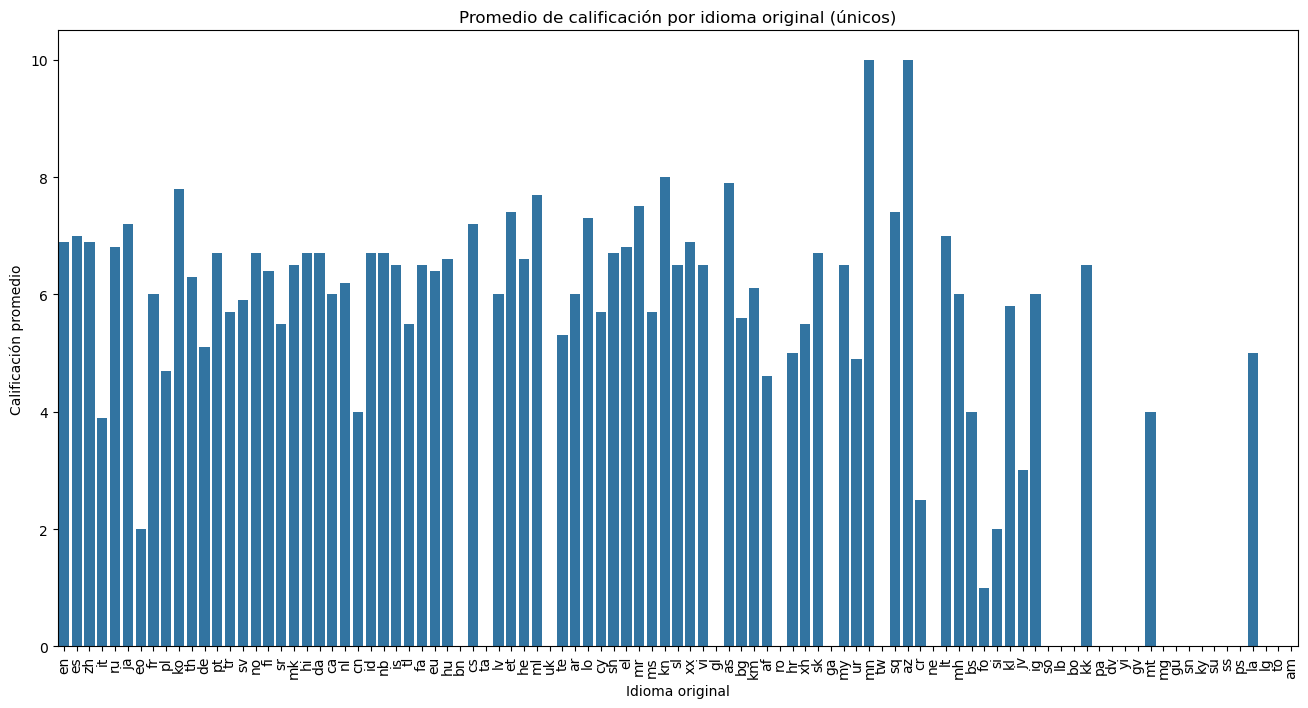

In [ ]:
unique_lang = df.drop_duplicates(subset='original_language')
plt.figure(figsize=(16, 8))
sns.barplot(data=unique_lang, x='original_language', y='vote_average')
plt.title('Promedio de calificación por idioma original (únicos)')
plt.xlabel('Idioma original')
plt.ylabel('Calificación promedio')
plt.xticks(rotation=90)
plt.show()

## Análisis de correlación de las variables numéricas

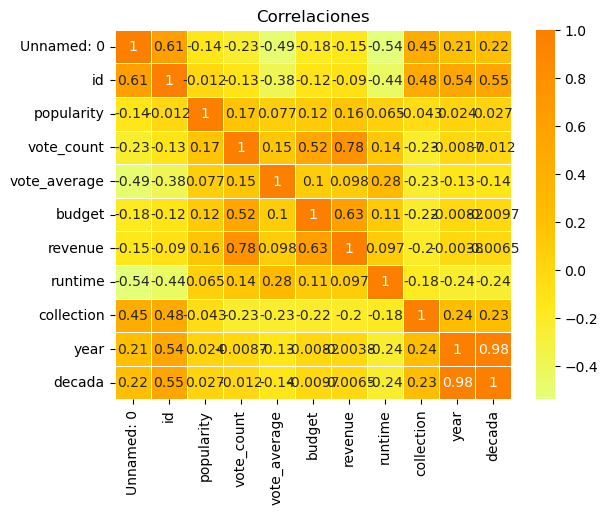

In [ ]:
corr = df.select_dtypes(include=['number']).corr()
hm = sns.heatmap(data=corr,
                 annot=True, linewidths=.5, cmap='Wistia')
hm.set(title='Correlaciones')
plt.show()

- La verdad no encontramos una correlación relevante entre dos variables. Si hay algunas fuertes como budget y revenue, vote count y revenue. Pero son correlaciones que son obvias o que se dan porque ambas variables son numeros muy grandes de cantidades similares. Por eso procedimos a mejor concentrarnos en las distribuciones de las variables.

## Distribución del presupuesto

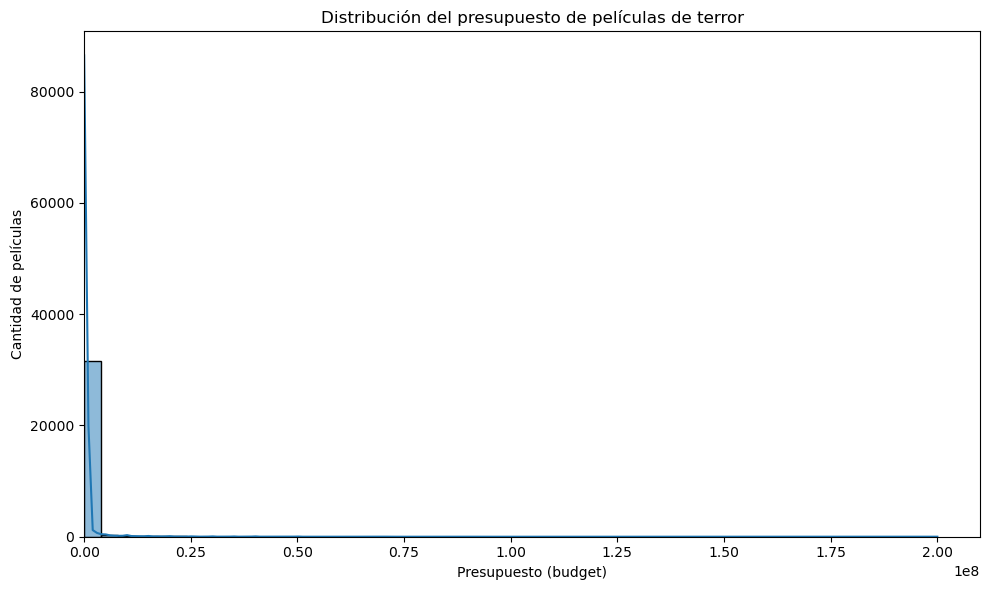

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['budget'], bins=50, kde=True)
plt.title('Distribución del presupuesto de películas de terror')
plt.xlabel('Presupuesto (budget)')
plt.ylabel('Cantidad de películas')
plt.xlim(left=0) # Para que no salgan presupuestos negativos
plt.tight_layout()
plt.show()


- Esta gráfica se lee en millones de dólares. Y en el eje y tenemos la cantidad de películas que tienen ese presupuesto.
- Aquí encontramos algo muy interesante. La gran mayoría de las películas de terror tienen un presupuesto bajísimo. Nos acordamos de John Carpenter que es de los primeros directores de terror y que hacía películas con presupuestos muy bajos. Uno podría decir que ese ha sido el estilo de terror desde siempre. 

Esto nos dió más curiosidad de seguir indagando en el dataset. Así que decidimos ver si había alguna relación entre el presupuesto y la calificación de las películas para ver si influye en la calidad de la película. Todos sabemos que anabel y winnie poo asesino son películas muy malas pero muy taquilleras. Pero también hay clásicos como el exorcista, halloween, carrie, etc. que son películas de terror que han sido muy exitosas y que han tenido un presupuesto bajo.

## Relación entre calificación y presupuesto

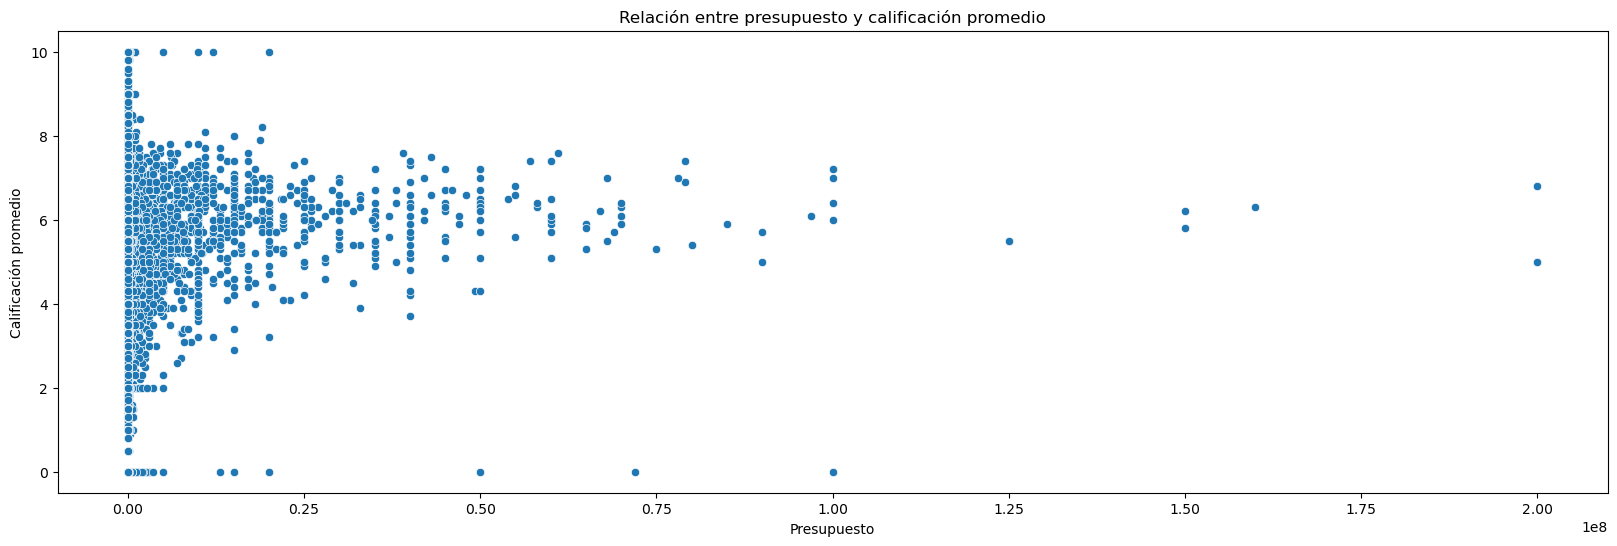

In [17]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='budget', y='vote_average')
plt.title('Relación entre presupuesto y calificación promedio')
plt.xlabel('Presupuesto')
plt.ylabel('Calificación promedio')
plt.show()

- Primero que nada, vemos que el presupuesto máximo es de 200 millones de dólares. Solamente hay 2 películas. Y la mayoría de las películas están por debajo de los 25 millones de dólares. 
- Teniendo eso en cuenta, vemos que las películas que pasan los 25 millones de dólares no llegan al 8 de calificación. Y se mantienen entre 5 y 7. De alguna manera podríamos decir que son películas taquilleras que no son tan buenas o no envejecen tan bien.
- Pero las películas con muy bajo presupuesto varían demasiado en calificación. Hay películas que son muy malas y otras que son muy buenas. Incluso clásicos de terror muy influyentes. 
- Entonces podríamos decir que el presupuesto no es un factor determinante en la calidad de la película. Sobre todo cuando estamos hablando del géneros de terror. 

## Enlace al video explicativo

